[2.0, 32.89186615049969, 8.0278587612125, 0.44235358533571334]


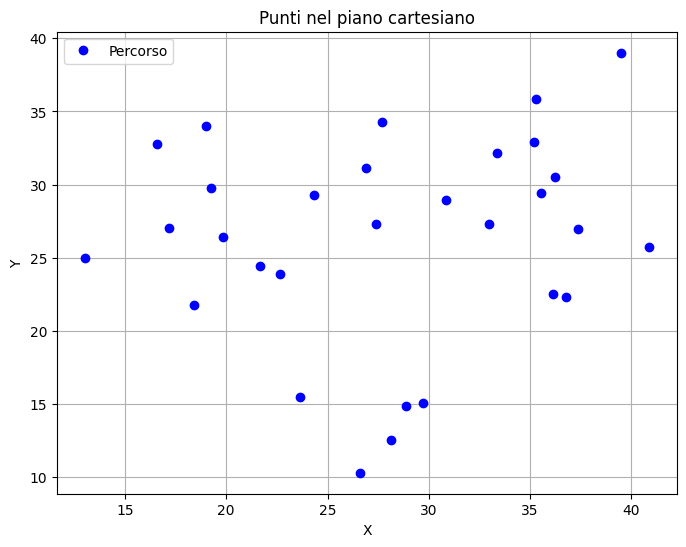

Salvato: Data/punti_53D-2000_30agent_classOKok_seed12/passo_1.txt


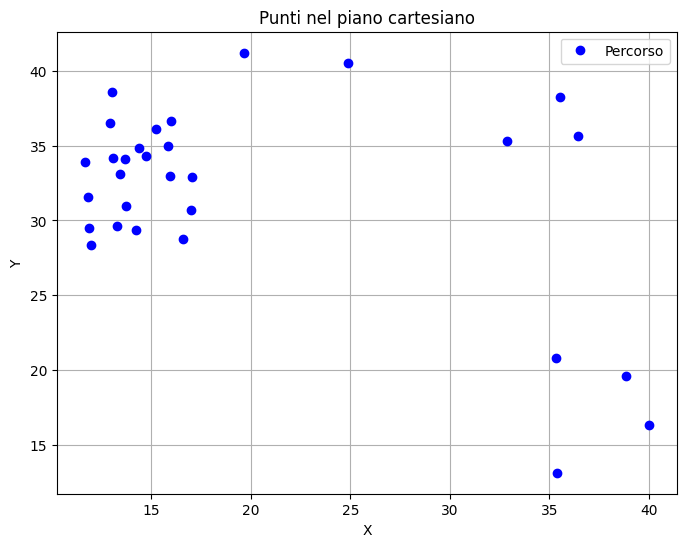

Salvato: Data/punti_53D-2000_30agent_classOKok_seed12/passo_2.txt


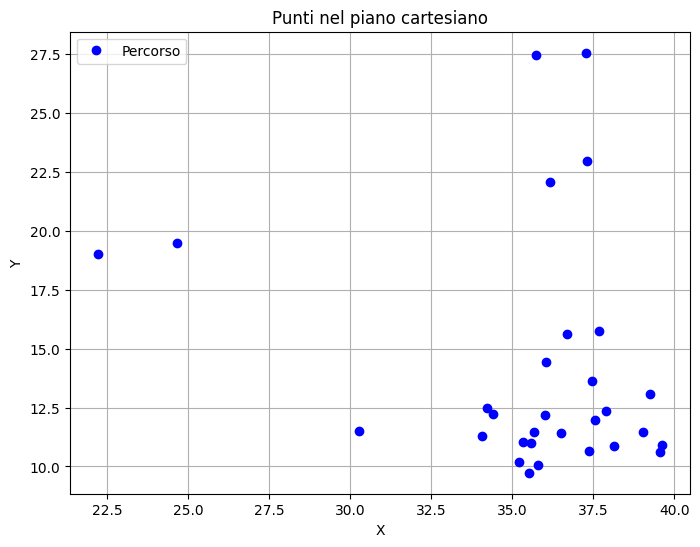

Salvato: Data/punti_53D-2000_30agent_classOKok_seed12/passo_3.txt


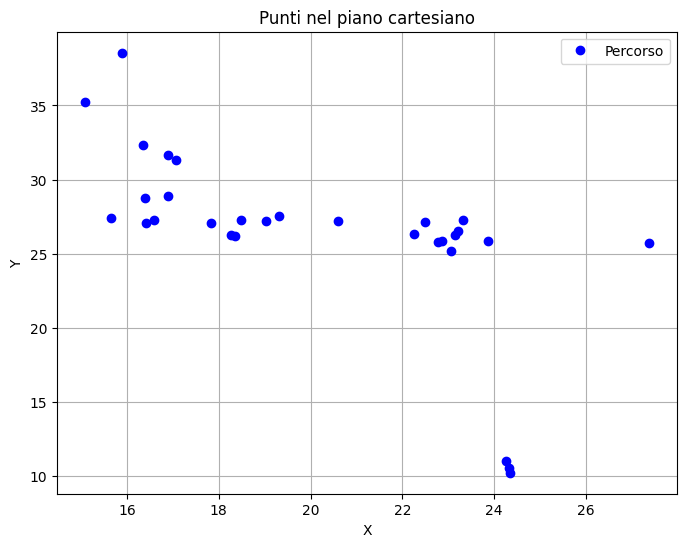

Salvato: Data/punti_53D-2000_30agent_classOKok_seed12/passo_4.txt


In [7]:
# 2000 punti 2D hanno lo stesso target. Ci sono 5 target e 30 volatili.

import os
import matplotlib.pyplot as plt
import numpy as np

data_buffer = []
file_count = 0
save_dir="Data/punti_53D-2000_30agent_classOKok_seed12"
#num_dati = 2000
num_fonti = 30
num_freeze = 4

with open("Data/agent_coordinates_seed12_3D_step900SEL.txt", "r") as f:
    data = []  # Lista per contenere tutte le righe processate
    v = []
    
    for line in f:
        line = line.strip().replace(";", "")  # Rimuove il punto e virgola alla fine
        parts = line.split(",", 1)  # Divide solo sulla prima virgola

        if len(parts) == 2:  # Assicuriamoci che ci siano due parti
            first_num = float(parts[0])  # Converti il primo numero in float
            other_nums = list(map(float, parts[1].split()))  # Converti gli altri numeri

            data.append([first_num] + other_nums)  # Unisci tutto in una lista per riga

print(data[0])
#print(data[300][1],data[300][3])

for j in range(num_fonti): # estraiamo solo 10 volatili
    # 9 target/freeze, coordinate per percorso di uno specifico volatile su 59 volatili potenziali nel file .txt
    # 30, 90, 160, 210, 260, 360, 390, 607, 823
    #v.append([data[j][1],data[j][3]]) # primo freeze a 0 # sparsi
    #v.append([data[(30*59)+j][1],data[(30*59)+j][3]]) # secondo freeze al passo 30 # centro
    v.append([data[(90*59)+j][1],data[(90*59)+j][3]]) # secondo freeze al passo 90 # basso centro
    v.append([data[(160*59)+j][1],data[(160*59)+j][3]]) # primo freeze al passo 160 # 2 gruppi
    v.append([data[(210*59)+j][1],data[(210*59)+j][3]]) # secondo freeze al passo 210 # basso dx
    #v.append([data[(260*59)+j][1],data[(260*59)+j][3]]) # secondo freeze al passo 260 #alto sx
    v.append([data[(360*59)+j][1],data[(360*59)+j][3]]) # secondo freeze al passo 360 # alto dx
    #v.append([data[(390*59)+j][1],data[(390*59)+j][3]]) # primo freeze al passo 390 # 3 gruppi
    #v.append([data[(607*59)+j][1],data[(607*59)+j][3]]) # secondo freeze al passo 607 # centro dx
    #v.append([data[(823*59)+j][1],data[(823*59)+j][3]]) # secondo freeze al passo 823 # sx basso

#vector=v[0:9] # percorso del volatile 1 (con prefisso 2 in data!)


n=[]
for k in range(num_freeze): # =10 percorsi
    data_buffer = []
    for z in range(num_fonti): # =10 volatili
        n.append(v[z*num_freeze+k])
        data_buffer.append(v[z*num_freeze+k])
    punti_data = np.array(data_buffer)

    x_values = [p[0] for p in data_buffer]
    y_values = [p[1] for p in data_buffer]

    #Crea il grafico
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, marker='o', linestyle='', color='b', label="Percorso")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Punti nel piano cartesiano")
    plt.grid(True)
    plt.legend()
    plt.show()
    
    # Salva il batch in un file di testo
    file_path = os.path.join(save_dir, f"passo_{k + 1}.txt")
    np.savetxt(file_path, punti_data, fmt="%.6f", delimiter=",")
    print(f"Salvato: {file_path}")


